<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Project/ESAA_Mini(2)_1%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Load

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/wine/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/wine/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/wine/sample_submission.csv')

train.drop(columns='index', inplace=True)
test.drop(columns='index', inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(5497, 13)
(1000, 12)
(1000, 2)


In [ ]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


# 2. EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


- null 없음
- type만 object, 나머지는 모두 수치형

## Distribution_train

In [ ]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.756595
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,1.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,1.000000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,1.000000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


<Axes: xlabel='quality', ylabel='Density'>

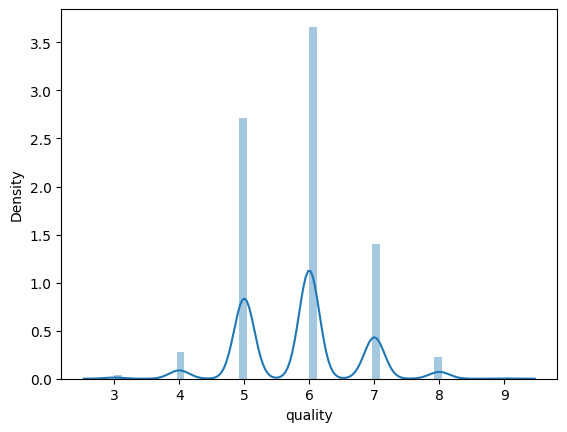

In [ ]:
sns.distplot(train['quality'])

In [1]:
plt.figure(figsize=(12,12))
for i in range(1, train.shape[1]):
  plt.subplot(3,4,i)
  sns.distplot(train.iloc[:,i])
plt.tight_layout()

NameError: name 'plt' is not defined

- chlorides, free sulfur dioxide, density, residual sugar

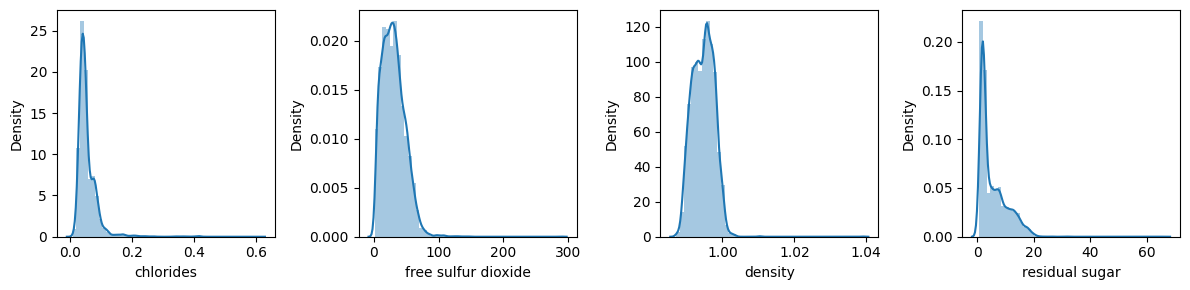

In [ ]:
loglist = ['chlorides', 'free sulfur dioxide', 'density', 'residual sugar']

plt.figure(figsize=(12,3))
for i in range(4):
  plt.subplot(1,4,i+1)
  sns.distplot(train[loglist[i]])
plt.tight_layout()

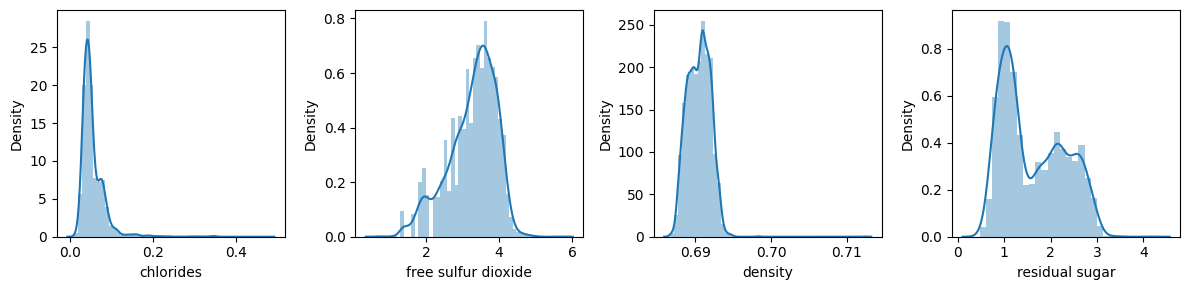

In [ ]:
plt.figure(figsize=(12,3))
for i in range(4):
  plt.subplot(1,4,i+1)
  sns.distplot(np.log1p(train[loglist[i]]))
plt.tight_layout()

## Correlation

<Axes: >

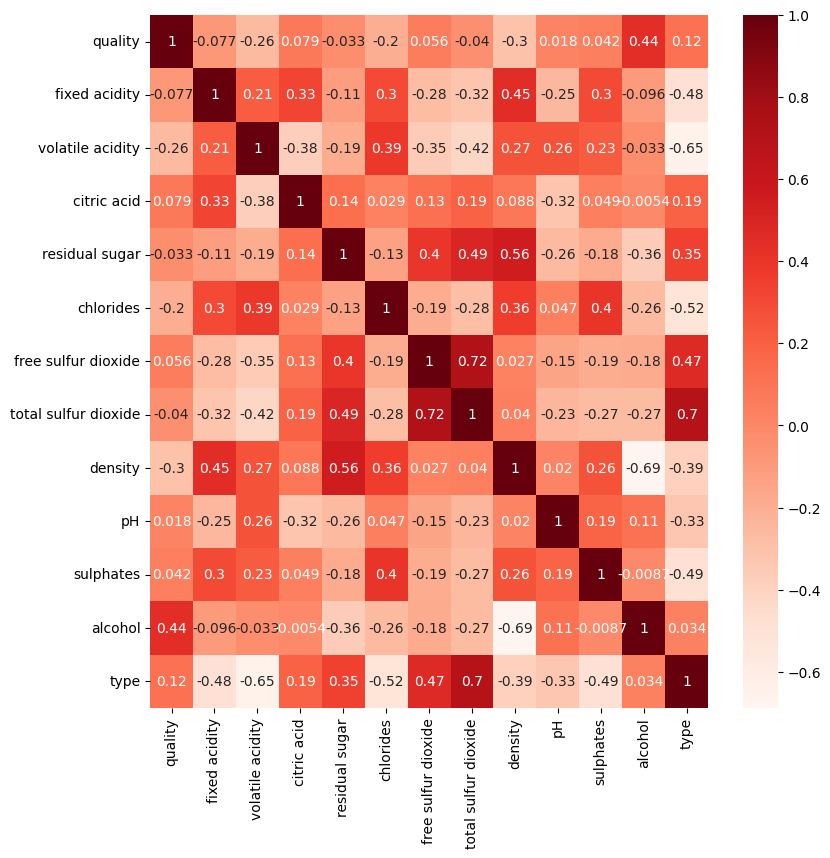

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(), annot=True, cmap='Reds')

quality와 상관관계 높은 features
- alcohol: 0.44
- density: -0.3
- volatile acidity: -0.26

<Axes: xlabel='density', ylabel='Count'>

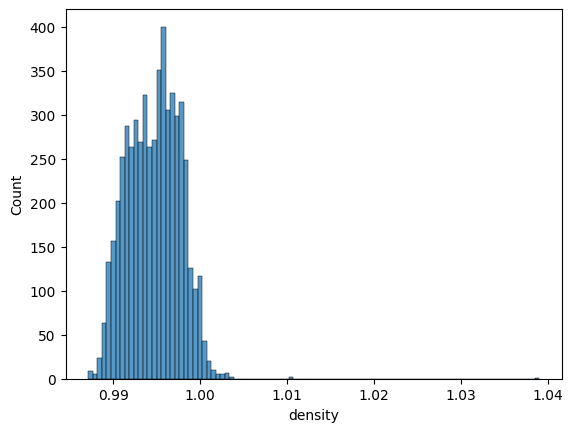

In [ ]:
sns.histplot(train['density'])

<Axes: xlabel='density', ylabel='Count'>

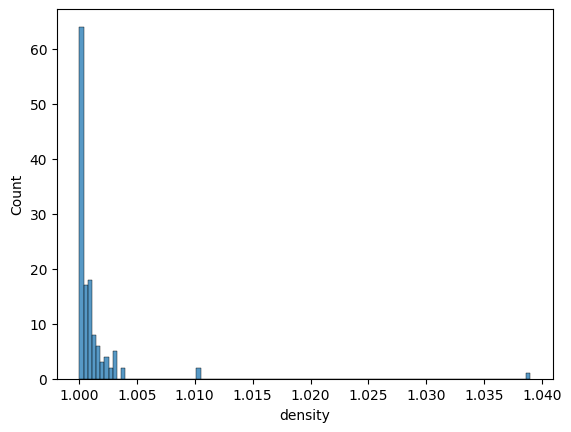

In [ ]:
sns.histplot(train[train['density']>1]['density'])

rightskewed 심함
1. log 변환
2. outlier 제거

<Axes: xlabel='density', ylabel='Count'>

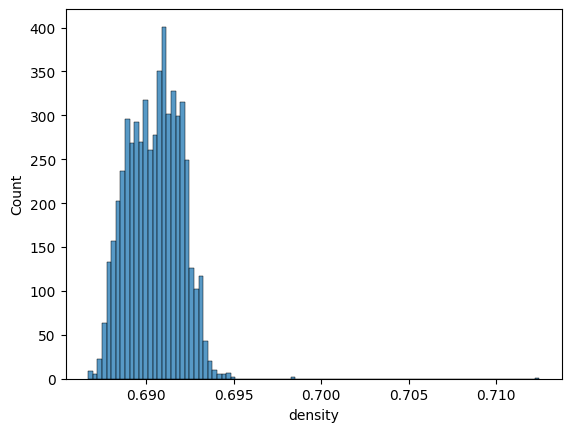

In [ ]:
# 로그 변환
den_log = np.log1p(train['density'])
sns.histplot(den_log)

- 로그변환해도 크게 개선되지 않음

### Alcohol

<Axes: xlabel='quality', ylabel='alcohol'>

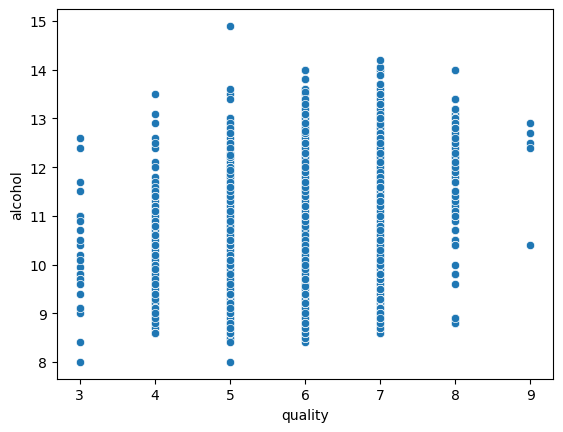

In [ ]:
sns.scatterplot(x='quality', y='alcohol', data=train)

In [ ]:
v_out = np.quantile(train['volatile acidity'], 0.995)
train[train['volatile acidity']>v_out].quality.value_counts()

quality
5    10
4     8
6     5
3     4
Name: count, dtype: int64

In [ ]:
t_out = np.quantile(train['total sulfur dioxide'], 0.995)
train[train['total sulfur dioxide']>t_out].quality.value_counts()

quality
5    14
6     9
3     3
4     1
Name: count, dtype: int64

In [ ]:
t_out = np.quantile(train['alcohol'], 0.995)
train[train['alcohol']>t_out].quality.value_counts()

quality
7    15
6     6
8     2
5     1
Name: count, dtype: int64

### type

<Axes: xlabel='type', ylabel='quality'>

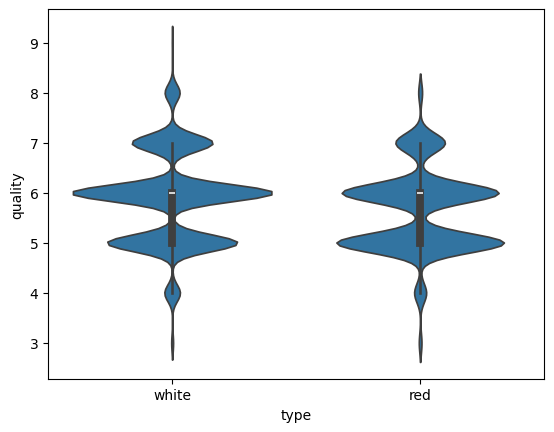

In [41]:
sns.violinplot(data=train, x='type', y='quality')

# 3. Preprocessing

## Outlier_density

In [ ]:
sns.histplot(train['density'])

In [ ]:
den_out = np.quantile(train['density'], 0.995)
# 1.0014
den_out_idx = train[train['density']>den_out].index
den_out_idx

In [ ]:
train_drop = train.drop(den_out_idx, axis=0)

## 최종 전처리 함수

In [ ]:
def drop_outlier(df=None, column=None, out_val=None):
  den_out_idx = df[df[column]>out_val].index
  df = df.drop(den_out_idx, axis=0)
  return df

In [ ]:
v_out = np.quantile(train['volatile acidity'], 0.995)
t_out = np.quantile(train['total sulfur dioxide'], 0.995)
a_out = np.quantile(train['alcohol'], 0.995)

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def my_preprocess(train_df, test_df):
  train_final = train_df.copy()
  test_final = test_df.copy()
  # drop outlier
  #train_final = drop_outlier(train_final, 'volatile acidity', v_out)
  #train_final = drop_outlier(train_final, 'total sulfur dioxide', t_out)
  #train_final = drop_outlier(train_final, 'alcohol', a_out)
  # add 'quality_cat'
  #train_final['quality_cat'] = train_final.quality.apply(lambda q: 'low' if q <= 4 else 'medium' if q <= 7 else 'high')

  # feature selection
  #train_final = train_final.drop(columns='type')
  #test_final = test_final.drop(columns='type')

  # Label encoding
  train_final['quality'] = le.fit_transform(train_final['quality'])
  #train_final['type'] = le.fit_transform(train_final['type'])
  #test_final['type'] = le.transform(test_final['type'])

  # One-Hot encoding
  #train_final = pd.get_dummies(train_final, columns=['quality_cat'])

  # 로그 변환
  log_list = ['chlorides', 'free sulfur dioxide', 'density', 'residual sugar']
  #log_list = train_final.columns[1:-1]
  for i in range(len(log_list)):
    train_final[log_list[i]] = np.log1p(train_final[log_list[i]])
    test_final[log_list[i]] = np.log1p(test_final[log_list[i]])


  # 전체 피처 정규화 - 'type'(binary) 제외
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(train_final.loc[:, 'fixed acidity':'alcohol'])
  # train
  #train_final.loc[:, 'fixed acidity':'alcohol'] = scaler.transform(train_final.loc[:, 'fixed acidity':'alcohol'])
  # test
  #test_final.loc[:, 'fixed acidity':'alcohol'] = scaler.transform(test_final.loc[:, 'fixed acidity':'alcohol'])

  return train_final, test_final

## Train/Test split

In [51]:
from sklearn.model_selection import train_test_split

train_f, test_f = my_preprocess(train, test)

wine_X = train_f.drop(columns='quality')
wine_Y = train_f['quality']

X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_Y, test_size=0.2, random_state=0)

In [52]:
train_f.shape

(5497, 12)

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0, k_neighbors=3)
X_train_over, y_train_over = smote.fit_resample(train_f.drop(columns='quality'), train_f['quality'])
y_train_over.value_counts()

quality
2    2416
3    2416
4    2416
5    2416
1    2416
0    2416
6    2416
Name: count, dtype: int64

# 4. Modeling

In [5]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
from sklearn.metrics import accuracy_score

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  accuracy = accuracy_score(y_test , pred)
  print('정확도: ', accuracy)
  return pred, pred_proba

In [6]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix
def print_recall_precision(y_true, y_predict):
  precision = precision_score(y_true, y_predict, average= "macro")
  recall = recall_score(y_true, y_predict,average= "macro")
  print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))
  print(confusion_matrix(y_true, y_predict))

## LightGBM
- base: 0.6718181818181819
- density outlier(>0.995) drop: 0.6557077625570776
- (max_depth=128, min_child_samples=50, num_leaves=64, subsample=0.8, boost_from_average=False, verbose=-1)
  - 0.6809090909090909
- max_depth=128, min_child_samples=50, num_leaves=64, subsample=0.6, boost_from_average=False, verbose=-1
  - 0.6818181818181818

In [53]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve

lgb = LGBMClassifier(max_depth=128, min_child_samples=50, num_leaves=64, subsample=0.6, boost_from_average=False, verbose=-1)
lgb_pred, lgb_proba = get_model_train_eval(lgb, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, lgb_pred)

정확도:  0.68
정밀도: 0.4472, 재현율: 0.3472
[[  0   0   4   3   0   0   0]
 [  0   4  23  14   0   0   0]
 [  0   4 254  85   3   0   0]
 [  0   2  82 398  33   0   0]
 [  0   0   2  72  83   4   0]
 [  0   0   0  15   5   9   0]
 [  0   0   0   0   1   0   0]]


### Hyper Parameter

In [89]:
params = {'max_depth':[50,100,150,200], 'num_leaves':[64, 128], 'min_child_samples':[20,30,50], 'subsample':[0.6, 0.7,0.8,0.9]}

from sklearn.model_selection import GridSearchCV
lgb = LGBMClassifier(boost_from_average=False, verbose=-1)
gridcv = GridSearchCV(lgb, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

KeyboardInterrupt: 

In [13]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgb_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy:', lgb_score)
print_recall_precision(y_test, gridcv.predict(X_test))

NameError: name 'gridcv' is not defined

## XGBoost
- base: 0.6609090909090909
- GridSearchCV 최적 파라미터: {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 3}
  - Accuracy: 0.6690909090909091
- GridSearchCV 최적 파라미터: {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 112, 'reg_alpha': 0.05, 'reg_lambda': 0.7}
  - Accuracy: 0.6827272727272727

In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier(colsample_bytree=0.75, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=112, reg_alpha=0.05, reg_lambda=0.7)
xgb_pred, xgb_proba = get_model_train_eval(xgb, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, xgb_pred)

정확도:  0.6818181818181818
정밀도: 0.4699, 재현율: 0.3475
[[  0   1   5   1   0   0   0]
 [  0   4  26  11   0   0   0]
 [  0   3 252  89   2   0   0]
 [  0   0  79 402  34   0   0]
 [  0   0   2  73  83   3   0]
 [  0   0   2  14   4   9   0]
 [  0   0   0   0   1   0   0]]


### Hyper Parameter

- 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.05, 'reg_lambda': 0.5

In [69]:
from sklearn.model_selection import GridSearchCV

params = {'colsample_bytree': [0.6,0.7,0.8], 'learning_rate': [0.1], 'max_depth': [5,10,15], 'min_child_weight': [1,2,3], 'n_estimators': [50,100,150], 'reg_alpha': [0.05], 'reg_lambda': [0.5]}
xgb = XGBClassifier(verbose=0)
# cv=3으로 지정
gridcv = GridSearchCV(xgb, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, verbose=1, eval_metric='auc', eval_set = [(X_train, y_train), (X_test, y_test)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[196]	validation_0-auc:0.94081	validation_1-auc:0.79546
[197]	validation_0-auc:0.94091	validation_1-auc:0.79545
[198]	validation_0-auc:0.94090	validation_1-auc:0.79568
[199]	validation_0-auc:0.94094	validation_1-auc:0.79560
[0]	validation_0-auc:0.74752	validation_1-auc:0.69963
[1]	validation_0-auc:0.76213	validation_1-auc:0.70933
[2]	validation_0-auc:0.77610	validation_1-auc:0.72165
[3]	validation_0-auc:0.78478	validation_1-auc:0.72335
[4]	validation_0-auc:0.79140	validation_1-auc:0.72674
[5]	validation_0-auc:0.79767	validation_1-auc:0.72584
[6]	validation_0-auc:0.80219	validation_1-auc:0.72711
[7]	validation_0-auc:0.80713	validation_1-auc:0.72727
[8]	validation_0-auc:0.81176	validation_1-auc:0.72721
[9]	validation_0-auc:0.81546	validation_1-auc:0.72851
[10]	validation_0-auc:0.81788	validation_1-auc:0.72998
[11]	validation_0-auc:0.82114	validation_1-auc:0.73303
[12]	validation_0-auc:0.82525	validation_1-auc:0.73599
[13]	validation_0-auc:0.82917	valid

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'learning_rate': [0.1], 'max_depth': [5, 10, 20, 30],
                         'min_child_weight': [1, 3, 10, 20],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0.01, 0.05, 0.1],
                         'reg_lambda': [0.5, 0.6, 0.7]})

In [70]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
xgb_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(xgb_score))
print_recall_precision(y_test, gridcv.predict(X_test))

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.05, 'reg_lambda': 0.5}
Accuracy: 0.6781818181818182
정밀도: 0.5077, 재현율: 0.3409
[[  0   0   6   1   0   0   0]
 [  0   3  26  12   0   0   0]
 [  0   1 249  95   1   0   0]
 [  0   0  82 405  28   0   0]
 [  0   0   1  77  80   3   0]
 [  0   0   0  16   4   9   0]
 [  0   0   0   0   1   0   0]]


## RandomForest
- base: 0.6872727272727273
- density outlier(>0.995) drop: 0.6684931506849315
- **scaling**: 0.6918181818181818
- **max_depth=21, n_estimators=500**: 0.7045454545454546

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=22, n_estimators=500)
rf_pred, rf_proba = get_model_train_eval(rf, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, rf_pred)

정확도:  0.7
정밀도: 0.5438, 재현율: 0.3552
[[  0   0   6   1   0   0   0]
 [  0   4  25  12   0   0   0]
 [  0   1 259  85   1   0   0]
 [  0   0  74 413  28   0   0]
 [  0   0   1  74  85   1   0]
 [  0   0   0  15   5   9   0]
 [  0   0   0   0   1   0   0]]


### 예측 값 확인

In [ ]:
predict_df = pd.concat([pd.DataFrame(y_test.values),pd.DataFrame(rf_pred)], axis=1)
predict_df.columns=['y_true', 'y_predict']
predict_df['correct'] = predict_df['y_true']==predict_df['y_predict']
predict_df

,y_true,y_predict,correct
0,2,2,True
1,3,3,True
2,3,3,True
3,2,2,True
4,2,2,True
...,...,...,...
1095,3,2,False
1096,2,2,True
1097,3,3,True
1098,3,3,True


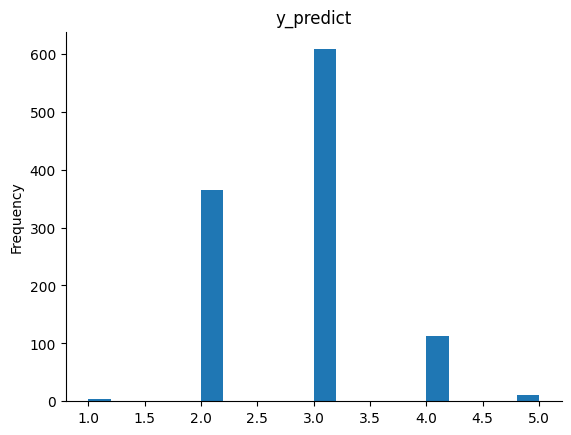

In [ ]:
from matplotlib import pyplot as plt
_df_2['y_predict'].plot(kind='hist', bins=20, title='y_predict')
plt.gca().spines[['top', 'right',]].set_visible(False)

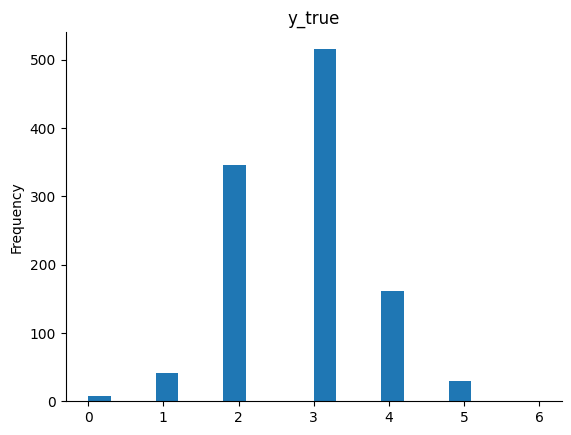

In [ ]:
from matplotlib import pyplot as plt
_df_1['y_true'].plot(kind='hist', bins=20, title='y_true')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='y_true', ylabel='count'>

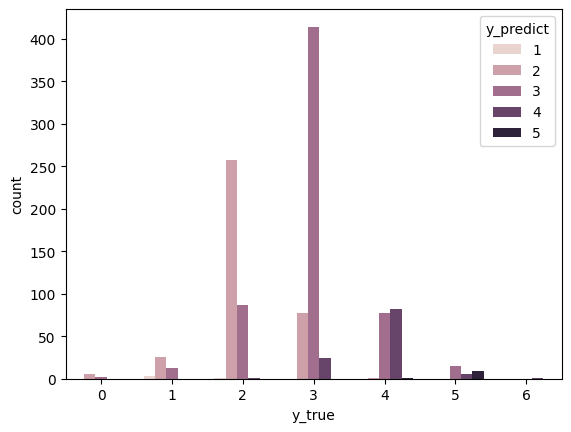

In [ ]:
sns.countplot(x='y_true', hue='y_predict', data=predict_df)

In [ ]:
predict_df[predict_df['y_true']==6]

In [ ]:
predict_df[predict_df['y_true']==0]

In [ ]:
predict_df[predict_df['y_predict']!=predict_df['y_true']]['y_true'].value_counts()/predict_df.shape[0]*100

In [ ]:
predict_df[predict_df['y_predict']!=predict_df['y_true']]['y_true'].value_counts()/y_test.value_counts()*100

In [ ]:
y_test.value_counts()/y_test.shape[0]*100

### Hyper Parameter

In [ ]:
params = {
    'n_estimators':[500],
    'max_depth' : [20,21,22,23,24]
}

# cv=3으로 지정
gridcv = GridSearchCV(rf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=22, n_estimators=500),
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'n_estimators': [500]})

In [37]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
rf_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(rf_score))
print_recall_precision(y_test, gridcv.predict(X_test))

NameError: name 'gridcv' is not defined

- GridSearchCV 최적 파라미터: {'max_depth': 20, 'n_estimators': 500}
  - Accuracy: 0.7018181818181818
  - Accuracy: 0.6972727272727273

- GridSearchCV 최적 파라미터: {'max_depth': 40, 'n_estimators': 500}
  - Accuracy: 0.6972727272727273

- GridSearchCV 최적 파라미터: {'max_depth': 21, 'n_estimators': 500}
  - Accuracy: 0.6990909090909091

- GridSearchCV 최적 파라미터: {'max_depth': 22, 'n_estimators': 500}
  - Accuracy: 0.6981818181818182

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred, dt_proba = get_model_train_eval(dt, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, dt_pred)

정확도:  0.5872727272727273
정밀도: 0.3412, 재현율: 0.3417
[[  0   1   5   1   0   0   0]
 [  1  11  13  13   3   0   0]
 [  4  11 218 100  13   0   0]
 [  1  10 105 323  63  13   0]
 [  1   4   8  58  84   6   0]
 [  0   1   4   8   6  10   0]
 [  0   0   0   0   1   0   0]]


### Hyper Parameter

In [80]:
params = {'max_depth':[20,25,30], 'min_samples_split':[25,30,35]}

# cv=3으로 지정
gridcv = GridSearchCV(dt, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_split': [25, 30, 35]})

In [81]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
dt_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(dt_score))
print_recall_precision(y_test, gridcv.predict(X_test))

GridSearchCV 최적 파라미터: {'max_depth': 20, 'min_samples_split': 30}
Accuracy: 0.5227272727272727
정밀도: 0.2903, 재현율: 0.2596
[[  0   0   2   4   1   0   0]
 [  1   4  19  15   2   0   0]
 [  3   5 210 114  14   0   0]
 [  1   6 151 291  59   7   0]
 [  0   2  16  73  66   4   0]
 [  0   0   5  12   8   4   0]
 [  0   0   0   0   1   0   0]]


## Logistic Regression

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def my_preprocess(train_df, test_df):
  train_final = train_df.copy()
  test_final = test_df.copy()

  # Label encoding
  train_final['quality'] = le.fit_transform(train_final['quality'])
  train_final['type'] = le.fit_transform(train_final['type'])
  test_final['type'] = le.transform(test_final['type'])

  # 로그 변환
  log_list = train_final.columns[1:-1]
  for i in range(len(log_list)):
    train_final[log_list[i]] = np.log1p(train_final[log_list[i]])
    test_final[log_list[i]] = np.log1p(test_final[log_list[i]])


  # 전체 피처 정규화 - 'type'(binary) 제외
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(train_final.loc[:, 'fixed acidity':'alcohol'])
  # train
  train_final.loc[:, 'fixed acidity':'alcohol'] = scaler.transform(train_final.loc[:, 'fixed acidity':'alcohol'])
  # test
  test_final.loc[:, 'fixed acidity':'alcohol'] = scaler.transform(test_final.loc[:, 'fixed acidity':'alcohol'])

  return train_final, test_final

In [14]:
### Logistic Regression용 (정규화, 로그변환) ###

train_f, test_f = my_preprocess(train, test)
wine_X = train_f.drop(columns='quality')
wine_Y = train_f['quality']

X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_Y, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='liblinear',C=10, penalty='l1')
lg.fit(X_train, y_train)
lg_pred, lg_proba = get_model_train_eval(lg, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, lg_pred)

정확도:  0.5754545454545454
정밀도: 0.3815, 재현율: 0.2220
[[  0   0   6   1   0   0   0]
 [  0   1  27  13   0   0   0]
 [  0   0 233 113   0   0   0]
 [  0   0 123 380  12   0   0]
 [  0   0   7 135  19   0   0]
 [  0   0   3  21   5   0   0]
 [  0   0   0   0   1   0   0]]


### Hyper Parameter

In [11]:
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10.0]}
lg = LogisticRegression(solver='liblinear')
# cv=3으로 지정
gridcv = GridSearchCV(lg, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']})

In [14]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lg_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(lg_score))
print_recall_precision(y_test, gridcv.predict(X_test))

GridSearchCV 최적 파라미터: {'C': 10.0, 'penalty': 'l1'}
Accuracy: 0.5754545454545454
정밀도: 0.3815, 재현율: 0.2220
[[  0   0   6   1   0   0   0]
 [  0   1  27  13   0   0   0]
 [  0   0 233 113   0   0   0]
 [  0   0 123 380  12   0   0]
 [  0   0   7 135  19   0   0]
 [  0   0   3  21   5   0   0]
 [  0   0   0   0   1   0   0]]


## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred, knn_proba = get_model_train_eval(knn, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, knn_pred)

정확도:  0.5245454545454545
정밀도: 0.3341, 재현율: 0.2719
[[  0   2   5   0   0   0   0]
 [  0   7  18  16   0   0   0]
 [  1  12 260  65   6   2   0]
 [  0  19 199 261  34   2   0]
 [  0   3  29  86  43   0   0]
 [  0   0   7   9   7   6   0]
 [  0   0   0   1   0   0   0]]


In [17]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier()
# cv=3으로 지정
gridcv = GridSearchCV(knn, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [18]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
knn_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(knn_score))
print_recall_precision(y_test, gridcv.predict(X_test))

GridSearchCV 최적 파라미터: {'n_neighbors': 2}
Accuracy: 0.5754545454545454
정밀도: 0.3490, 재현율: 0.3139
[[  0   3   3   1   0   0   0]
 [  2  12  19   7   1   0   0]
 [  2  18 259  62   5   0   0]
 [  2  25 170 289  27   2   0]
 [  0   1  13  74  68   5   0]
 [  0   1   2  14   7   5   0]
 [  0   0   0   0   1   0   0]]


## GBM

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_pred, gbm_proba = get_model_train_eval(gbm, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, gbm_pred)

정확도:  0.6027272727272728
정밀도: 0.3762, 재현율: 0.2811
[[  0   0   4   3   0   0   0]
 [  0   3  28  10   0   0   0]
 [  0   6 227 112   1   0   0]
 [  2   1 100 373  38   1   0]
 [  0   0   8  95  55   3   0]
 [  0   0   0  19   5   5   0]
 [  0   0   0   0   1   0   0]]


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gbm , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

## Soft Voting

In [37]:
from sklearn.ensemble import VotingClassifier
vc_weak = VotingClassifier(estimators=[('KNN',knn),('LR',lg),('DT',dt),('LGBM',lgb),('XGB',xgb),('GBM',gbm)], voting='soft')
vc_weak.fit(X_train, y_train)
vc_weak_pred, vc_weak_proba = get_model_train_eval(vc_weak, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, vc_weak_pred)

정확도:  0.68
정밀도: 0.5026, 재현율: 0.3433
[[  0   0   5   2   0   0   0]
 [  0   4  24  12   1   0   0]
 [  0   2 257  85   2   0   0]
 [  0   0  86 402  27   0   0]
 [  0   0   2  81  76   2   0]
 [  0   0   1  13   6   9   0]
 [  0   0   0   0   1   0   0]]


In [73]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('LGBM',lgb),('XGB',xgb),('RF',rf)], voting='soft')
vc.fit(X_train, y_train)
vc_pred, vc_proba = get_model_train_eval(vc, X_train, X_test, y_train, y_test)
print_recall_precision(y_test, vc_pred)

정확도:  0.6827272727272727
정밀도: 0.4633, 재현율: 0.3474
[[  0   0   6   1   0   0   0]
 [  0   4  26  11   0   0   0]
 [  0   4 254  86   2   0   0]
 [  0   1  81 402  31   0   0]
 [  0   0   2  74  82   3   0]
 [  0   0   0  15   5   9   0]
 [  0   0   0   0   1   0   0]]


- lgb, xgb, rf
  - 정확도:  0.6954545454545454
  - 정밀도: 0.4904, 재현율: 0.3543
- lgb, xgb, rf, lg
  - 정확도:  0.6927272727272727
  - 정밀도: 0.5155, 재현율: 0.3462

In [ ]:
params = {}
vc = VotingClassifier(estimators=[('LGBM',lgb),('XGB',xgb),('RF',rf)], voting='soft')
# cv=3으로 지정
gridcv = GridSearchCV(vc, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

In [ ]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
vc_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(vc_score))
print_recall_precision(y_test, gridcv.predict(X_test))

## Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

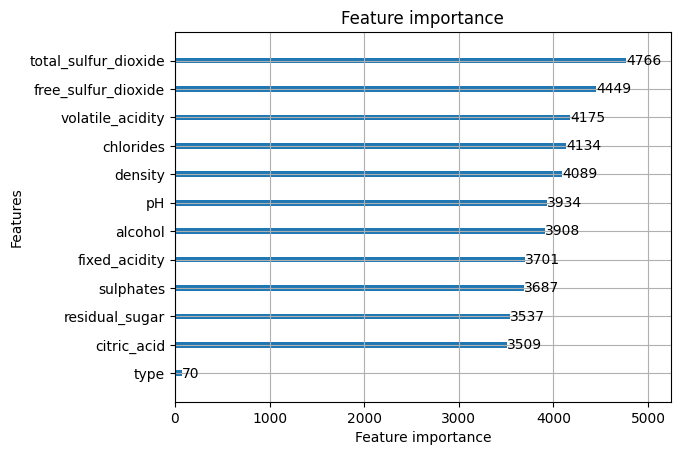

In [46]:
from lightgbm import plot_importance
plot_importance(lgb)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

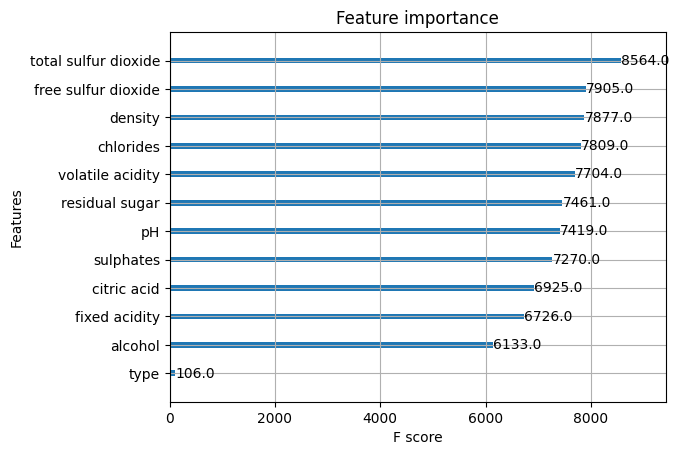

In [45]:
from xgboost import plot_importance
xgb.fit(X_train, y_train)
plot_importance(xgb)

<BarContainer object of 12 artists>

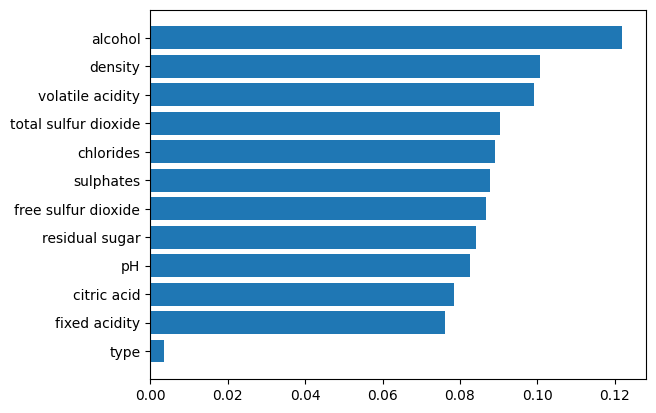

In [44]:
rf.feature_importances_
ser = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()
plt.barh(ser.index, ser)

**중요 피처**
- volatile acidity
- total sulfur dioxide
- alcohol(rf에서만)

### 다시 EDA

In [ ]:
train_f['quality'].value_counts()

<Axes: xlabel='quality', ylabel='volatile acidity'>

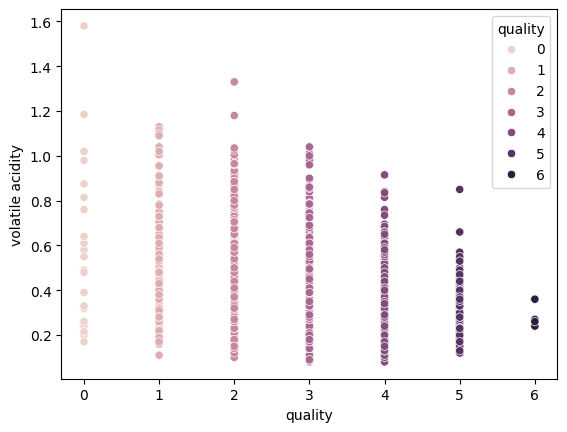

In [ ]:
sns.scatterplot(x='quality', y='volatile acidity', hue='quality', data=train_f)

In [ ]:
sns.distplot(train_f['volatile acidity'])

In [ ]:
sns.distplot(np.log1p(train['volatile acidity']))

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

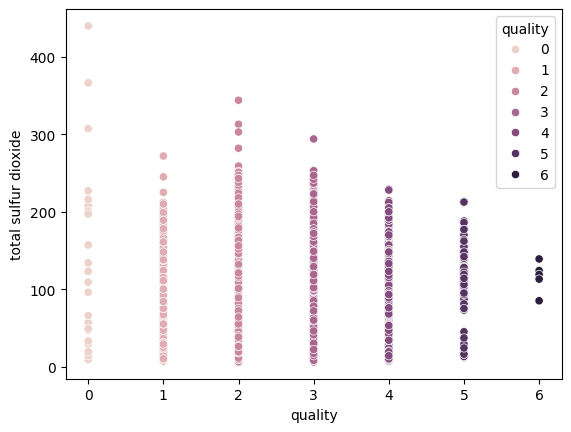

In [ ]:
sns.scatterplot(x='quality', y='total sulfur dioxide', hue='quality', data=train_f)

In [ ]:
sns.violinplot(x='quality', y='density', hue='quality', data=train_f)

<Axes: xlabel='quality', ylabel='alcohol'>

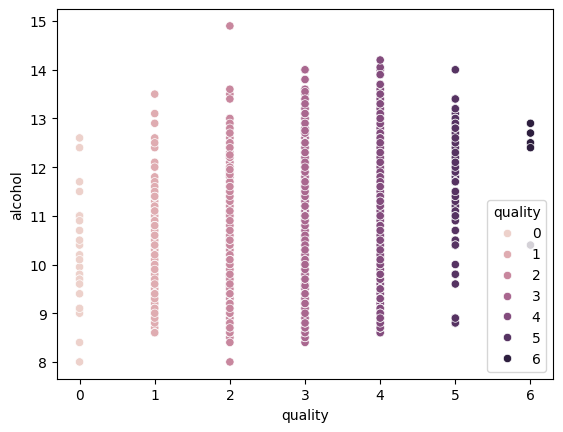

In [ ]:
sns.scatterplot(x='quality', y='alcohol', hue='quality', data=train_f)

## Stacking

In [10]:
# Step 1
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_te = X_train_n.iloc[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [74]:
lgb_train, lgb_test = get_stacking_base_datasets(lgb, X_train, y_train, X_test, 7)
xgb_train, xgb_test = get_stacking_base_datasets(xgb, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf, X_train, y_train, X_test, 7)
#knn_train, knn_test = get_stacking_base_datasets(knn, X_train, y_train, X_test, 7)
#dt_train, dt_test = get_stacking_base_datasets(dt, X_train, y_train, X_test, 7)
vc_train, vc_test = get_stacking_base_datasets(vc, X_train, y_train, X_test, 7)
#weak_train, weak_test = get_stacking_base_datasets(vc_weak, X_train, y_train, X_test, 7)

LGBMClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
VotingClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [81]:
# Step 2
Stack_final_X_train = np.concatenate((rf_train, vc_train), axis=1)
Stack_final_X_test = np.concatenate((rf_test, vc_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (4397, 11) 원본 테스트 피처 Shape: (1100, 11)
스태킹 학습 피처 데이터 Shape: (4397, 2) 스태킹 테스트 피처 데이터 Shape: (1100, 2)


In [82]:
final = RandomForestClassifier(max_depth=40, n_estimators=150)
final.fit(Stack_final_X_train, y_train)
stack_final = final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))
print_recall_precision(y_test, stack_final)

최종 메타 모델의 예측 정확도: 0.6964
정밀도: 0.5751, 재현율: 0.3484
[[  0   0   6   1   0   0   0]
 [  0   3  24  14   0   0   0]
 [  0   0 259  86   1   0   0]
 [  0   0  78 414  23   0   0]
 [  0   0   1  78  81   1   0]
 [  0   0   0  17   3   9   0]
 [  0   0   0   0   1   0   0]]


- max_depth=30, n_estimators=200
  - 정확도: 0.7018

In [83]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[30,50,100], 'n_estimators':[100,200,300,400]}
final = RandomForestClassifier()
# cv=3으로 지정
gridcv = GridSearchCV(final, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 50, 100],
                         'n_estimators': [100, 200, 300, 400]})

In [84]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
final_score = accuracy_score(y_test, gridcv.predict(X_test))
print('Accuracy: {0}'.format(final_score))
print_recall_precision(y_test, gridcv.predict(X_test))

GridSearchCV 최적 파라미터: {'max_depth': 30, 'n_estimators': 200}
Accuracy: 0.6927272727272727
정밀도: 0.5570, 재현율: 0.3521
[[  0   0   5   2   0   0   0]
 [  0   4  25  12   0   0   0]
 [  0   1 257  87   1   0   0]
 [  0   0  82 408  25   0   0]
 [  0   0   1  76  84   0   0]
 [  0   0   0  15   5   9   0]
 [  0   0   0   0   1   0   0]]


- GridSearchCV 최적 파라미터: {'max_depth': 30, 'n_estimators': 200}
  - Accuracy: 0.6981818181818182
- GridSearchCV 최적 파라미터: {'max_depth': 40, 'n_estimators': 150}
  - Accuracy: 0.6954545454545454
  - 정밀도: 0.5567, 재현율: 0.3550

# 5. Output

In [68]:
final.fit(train_f.drop(columns='quality'), train_f['quality'])

RandomForestClassifier(max_depth=40, n_estimators=150)

In [69]:
le.fit(train['quality'])
le.classes_

array([3, 4, 5, 6, 7, 8, 9])

In [70]:
submission['quality'] = le.inverse_transform(final.predict(test_f))

In [71]:
submission.quality.value_counts()

quality
6    502
5    355
7    126
8     11
4      6
Name: count, dtype: int64

0.702 결과
- 6 : 498
- 5   : 358
- 7  :  127
- 8   :  11
- 4   :   6

0.703 결과
- 6   : 502
- 5  :  355
- 7  :  126
- 8  :   11
- 4  :    6

In [72]:
submission.to_csv('sub_drop.csv', index=False)